<a href="https://colab.research.google.com/github/Tion286/Hello-world/blob/main/Copy_of_End_of_Week_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [124]:
df = pd.read_csv('/content/features_30_sec - features_30_sec.csv')

In [125]:
import pandas as pd # Import the pandas library and assign it the alias 'pd'

df = pd.read_csv('/content/features_30_sec - features_30_sec.csv')

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
df = df.drop('filename', axis = 1)

In [128]:
xcols = list(df.columns.values)[:-1]
ycols = list(df.columns.values)[-1:]

<h1>Complete the Following:</h1>
<ol>
  <li>One hot encode the y column.</li>
    <ul>
      <li>You can use the variable <strong>ycols</strong> from above which is the name of the y variable.</li>
      <li>Remember that the Pandas function to one hot encode is <strong>get_dummies()</strong> as we have seen in <strong>Day 3 Notebook</strong>.</li>
    </ul>
  <li>Scale the x columns.</li>
    <ul>
      <li>You can use the variable <strong>xcols</strong> from above which is the list of x variables.</li>
      <li>Use the function <strong>MinMaxScaler()</strong> which we saw an example of how to use in <strong>Day 7 Notebook</strong>.</li>
    </ul>
  <li>Split data into training and testing.</li>
    <ul>
      <li>Use <strong>train_test_split()</strong> as we have in <strong>Day 3 Notebook</strong>.</li>
      <li>As a parameter of train_test_split, set <strong>shuffle = True</strong> to shuffle rows.</li>
    </ul>
  <li>Build a sequential model with dense layers using keras.</li>
    <ul>
      <li>You saw how to do this in <strong>Day 7 Notebook</strong>.</li>
      <li>You can try out any activation function you want. I recommend testing <strong>relu, sigmoid, or linear</strong>.</li>
      <li>Incorporate as many layers as you want with as many incoming and outgoing nodes.</li>
      <li>Hint: in the first layer make sure you set the input size to be the number of x columns which you can get with the code <strong>len(xcols)</strong>.</li>
    </ul>
  <li>Predict for training and testing data.</li>
    <ul>
      <li>The outputs would be the probability that each sample is a certain class. Develop a function to map the highest predicted probability for a sample to a class.</li>
      <li>Hint: check each predicted sample and save the index of the highest value as the predicted class.</li>
    </ul>
  <li>Generate a confusion matrix for both the training and testing predictions.</li>
    <ul>
      <li>Use the function <strong>confusion_matrix()</strong> which we did in <strong>Day 3 Notebook</strong>.</li>
    </ul>
<ol>

In [129]:
# Convert the 'label' column to one-hot encoding
df_one_hot = pd.get_dummies(df, columns=['label'])

# Display the first few rows of the new DataFrame to verify the changes
df_one_hot.head()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,...,True,False,False,False,False,False,False,False,False,False
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,...,True,False,False,False,False,False,False,False,False,False
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,...,True,False,False,False,False,False,False,False,False,False
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,...,True,False,False,False,False,False,False,False,False,False
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,...,True,False,False,False,False,False,False,False,False,False


In [130]:
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and the one-hot encoded labels (y)
# 'filename' has already been dropped so we remove it from the list of columns to drop
X = df_one_hot.drop(columns=['length'] + [col for col in df_one_hot.columns if col.startswith('label_')])
y = df_one_hot[[col for col in df_one_hot.columns if col.startswith('label_')]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True)

In [132]:
y

,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,True


In [133]:
model = Sequential()
model.add(Dense(16, input_shape = (57,), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [159]:
model.fit(x_train, y_train, epochs = 2000)

Epoch 1/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.2522
Epoch 2/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2521
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.2520
Epoch 4/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2520
Epoch 5/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.2520
Epoch 6/2000
25/25 [==============================] - 0s 9ms/step - loss: 0.2521
Epoch 7/2000
25/25 [==============================] - 0s 10ms/step - loss: 0.2522
Epoch 8/2000
25/25 [==============================] - 0s 11ms/step - loss: 0.2521
Epoch 9/2000
25/25 [==============================] - 0s 10ms/step - loss: 0.2522
Epoch 10/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.2523
Epoch 11/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.2520
Epoch 12/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.2522
Epoch 13/2000
25/25 [=

In [160]:
y_train_prob = model.predict(x_train)
#y_test_prob = model.predict(len(xcols))
y_test_prob = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [161]:
def getClassLabels(y_prob):
  classLabels = []
  for i in y_prob:
    classLabels.append(np.argmax(i))
  return classLabels

<Axes: >

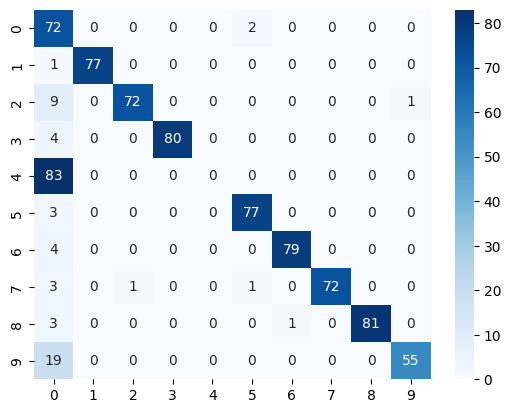

In [162]:
y_train_pred = getClassLabels(y_train_prob)
y_train_true = getClassLabels(np.array(y_train))
cmat_train = confusion_matrix(y_train_true, y_train_pred)
sns.heatmap(cmat_train, cmap = "Blues", annot = True)

<Axes: >

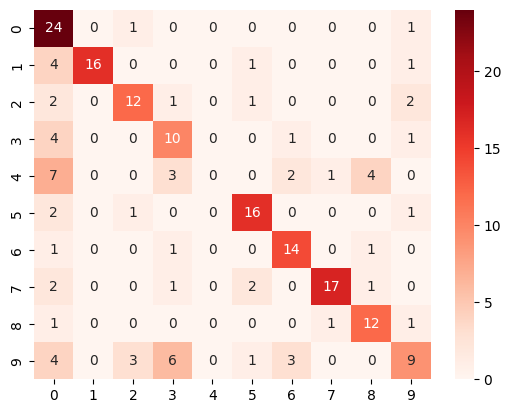

In [163]:
y_test_pred = getClassLabels(y_test_prob)
y_test_true = getClassLabels(np.array(y_test))
cmat_test = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cmat_test, cmap = "Reds", annot = True)

In [164]:
def accuracy(cmat_train, n):
  count = 0
  for i in range(len(cmat_train)):
    count += cmat_train[i][i]
  return count / n

In [165]:
accuracy(cmat_train, len(x_train))

0.83125

In [166]:
accuracy(cmat_test, len(x_test))

0.65